In [14]:
#read in file as dataframe 
# import pyspark modules
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *       # for datatype conversion
from pyspark.sql.functions import *   # for col() function
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.close('all')
import seaborn as sns

In [2]:
from pyspark.sql import SparkSession 
spark = SparkSession \
    .builder \
    .master("local") \
    .appName("app") \
    .config("spark.executor.memory", '2g') \
    .config('spark.executor.cores', '2') \
    .config('spark.cores.max', '2') \
    .config("spark.driver.memory",'4g') \
    .getOrCreate()

sc = SparkContext.getOrCreate()
sqlCtx = SQLContext(sc)

In [3]:
path_to_data = os.path.join("/home/jovyan/FlightDelay/clean_data_no_hot")

In [4]:
df = spark.read.format("csv") \
    .option("header", "true").option("inferschema","true").load(path_to_data)

In [42]:
df.columns

['_c0',
 'YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'DISTANCE',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'B_SCHEDULED_ARRIVAL',
 'B_ARRIVAL_TIME',
 'B_SCHEDULED_DEPARTURE',
 'B_DEPARTURE_TIME']

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


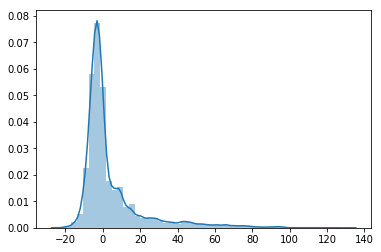

In [19]:
# Select DEPARTURE_DELAY column and sample and convert to pandas
sample_df = df.select(['DEPARTURE_DELAY']).sample(False, 0.25, 42)
pandas_df = sample_df.toPandas()

# Plot distribution of pandas_df and display plot
sns.distplot(pandas_df)
plt.show()

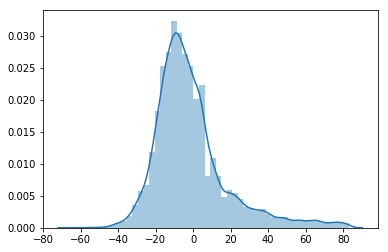

In [20]:
# Select ARRIVAL_DELAY column and sample and convert to pandas
sample_df = df.select(['ARRIVAL_DELAY']).sample(False, 0.25, 42)
pandas_df = sample_df.toPandas()

# Plot distribution of pandas_df and display plot
sns.distplot(pandas_df)
plt.show()

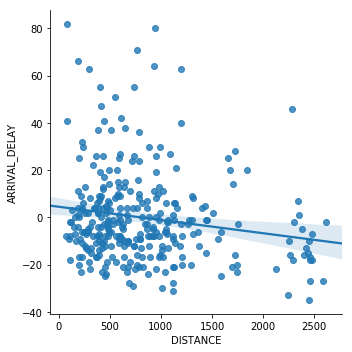

In [36]:
# Select DISTANCE and ARRIVAL_DELAY and sample
sample_df = df.select(["DISTANCE",'ARRIVAL_DELAY']).sample(False, 0.01, 42)

# Convert to pandas dataframe
pandas_df = sample_df.toPandas()

# Linear model plot of pandas_df
sns.lmplot(x='DISTANCE', y='ARRIVAL_DELAY', data=pandas_df)
#plt.show()

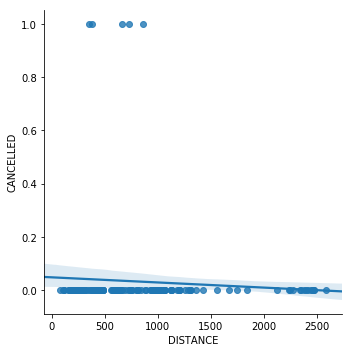

In [44]:
# Select DISTANCE and CANCELLED and sample
sample_df = df.select(["CANCELLED",'DISTANCE']).sample(False, 0.005, 42)

# Convert to pandas dataframe
pandas_df = sample_df.toPandas()

# Linear model plot of pandas_df
sns.lmplot(x='DISTANCE', y='CANCELLED', data=pandas_df)
#plt.show()